In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('data_clean.csv')

df = df.set_index("ID")

df.head()

,Categoria,Produto,Data,Preço,Qtd,Venda_Total
ID,,,,,,
0,Móveis,Mesa,2023-11-15,3156.95,18,56825.10
1,Eletrônicos,Teclado,2023-11-22,12521.72,9,112695.48
2,Vestuário,Casaco,2023-02-03,400.31,9,3602.79
3,Vestuário,Relógio,2023-09-25,540.21,8,4321.68
5,Eletrônicos,Smartphone,2023-07-25,3976.23,13,51690.99


In [17]:
# Análise temporal

## Criando coluna de mês/ano para fazer agregação mensal
df['Data'] = pd.to_datetime(df['Data'])
df['AnoMes'] = df['Data'].dt.to_period('M')

## Agrupar os dados por mês
vendas_mensal = df.groupby('AnoMes')['Venda_Total'].sum().reset_index()

vendas_mensal['AnoMes'] = vendas_mensal['AnoMes'].astype(str)

vendas_mensal.head(12)

,AnoMes,Venda_Total
0,2023-01,111049.66
1,2023-02,418221.12
2,2023-03,211975.45
3,2023-04,384283.57
4,2023-05,159093.61
5,2023-06,201650.80
6,2023-07,626249.45
7,2023-08,175142.73
8,2023-09,260014.93
9,2023-10,209360.52


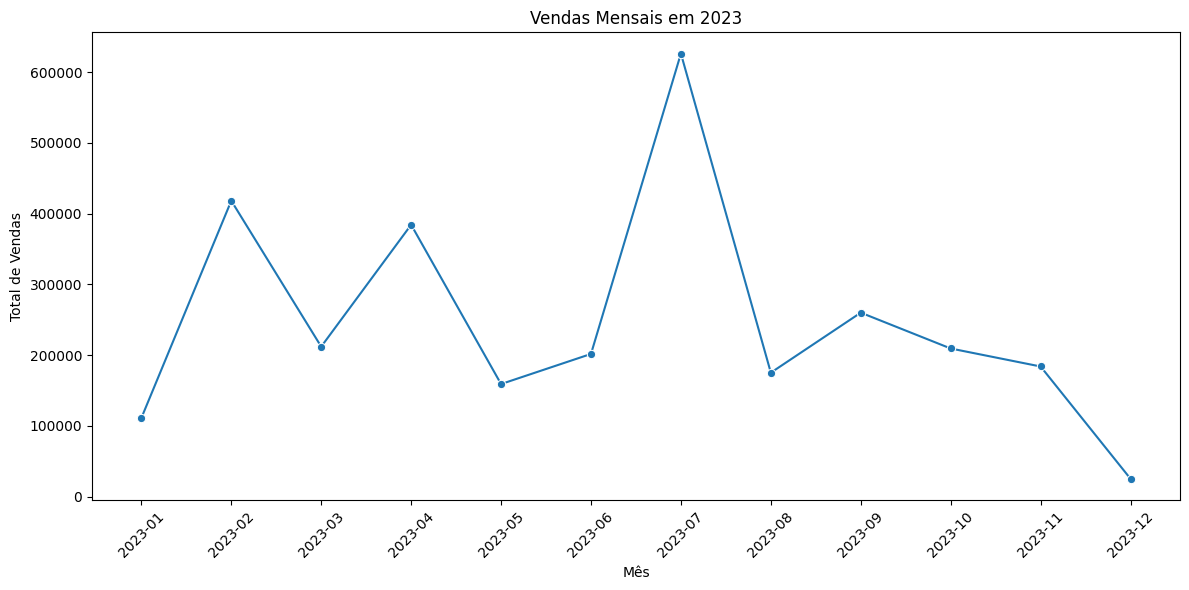

In [18]:
# Plot Gráfico de Linha

plt.figure(figsize=(12,6))
sns.lineplot(x='AnoMes', y='Venda_Total', data=vendas_mensal, marker='o')
plt.title('Vendas Mensais em 2023')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

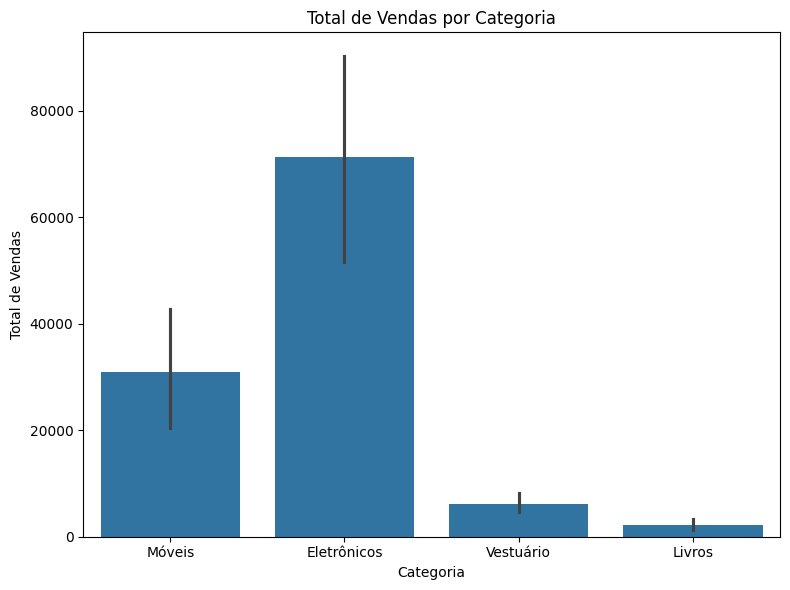

In [23]:
vendas_categoria = df.groupby('Categoria')['Venda_Total'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Categoria', y='Venda_Total')
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.tight_layout()
plt.show()


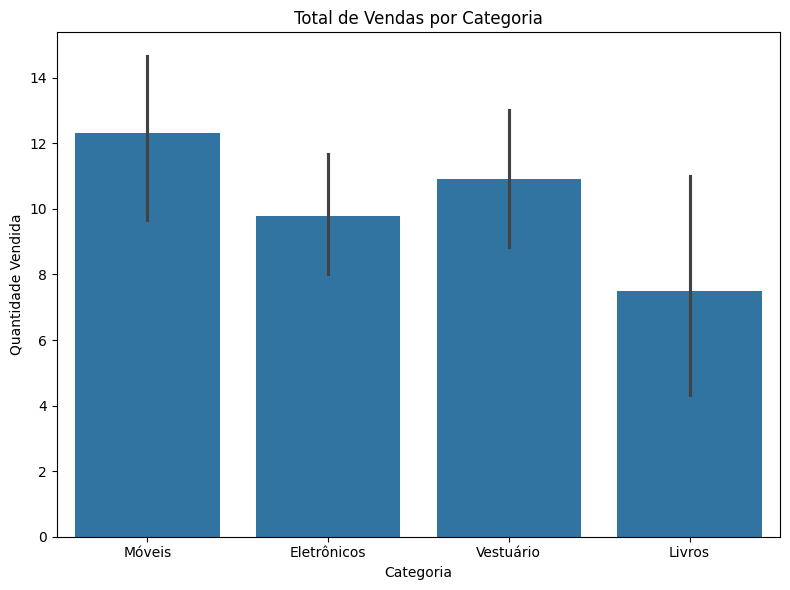

In [25]:
vendas_categoria = df.groupby('Categoria')['Qtd'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Categoria', y='Qtd')
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.tight_layout()
plt.show()


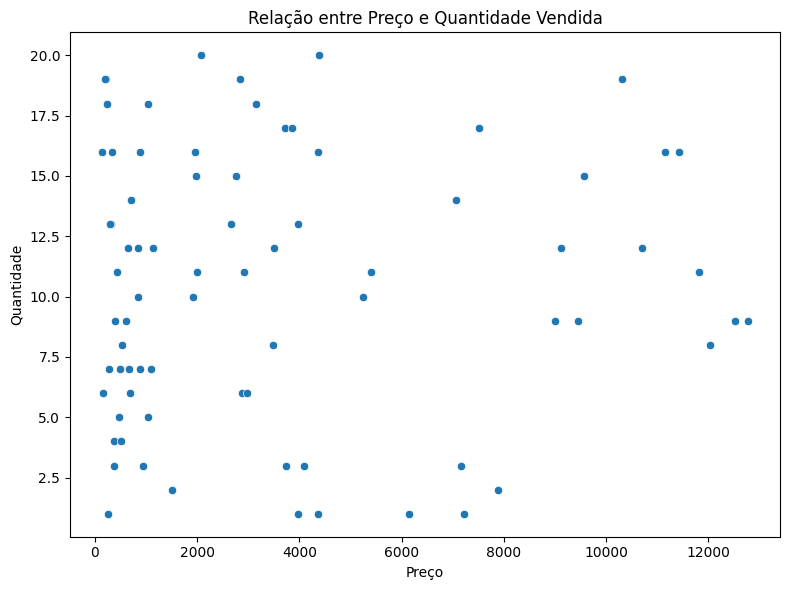

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Preço', y='Qtd')
plt.title('Relação entre Preço e Quantidade Vendida')
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()


# Análises dos Gráficos

## Gráfico de Linha
- É notável picos e vales entre meses alternados até julho. Pela variedade de produtos e quantidade, consideremos ser uma empresa distribuidora de mercadorias diversas. Nesse cenário, podemos considerar que a alternância das vendas pode significa um estoque alto dos clientes, suficiente para não realizarem novos pedidos no mês seguinte.
- A partir dessa análise, podemos considerar que no mês de julho houve alguma promoção em que os clientes compraram mercadorias suficientes para estoque para os meses seguintes e os meses de maior movimento, como novembro e dezembro, reduzindo seus custos e aumentando suas margens.
- É provável que no mês de Janeiro de 2024 um volume de vendas maior aconteça.

## Gráfico de Barras
- Fica claro o maior faturamento por vendas de eletrônicos
- Porém, ainda que o faturamento (ou vendas totais) dos eletrônicos seja maior que as outras três categorias somadas, não é a categoria que tem mais quantidades vendidas. Isto se deve, provavelmente, porque o ticket médio por venda de eletrônico é muito superior em relação as outras categorias.

## Gráfico de Dispersão
- Observamos uma quantidade vendida maior de produtos de ticket mais baixo. Ainda assim, considerando que o valor total de vendas da categoria de eletrônicos é maior, reforça a viabilidade de que alcançar altos faturamentos ao vender produtos de ticket mais alto.